# PFIELD RMS acoustic pressure field of a linear or convex array

PFIELD returns the radiation pattern of a uniform LINEAR or CONVEX array


## Syntax

1. RP, SPECT, idx = PFIELD(X,Y,Z,DELAYS,PARAM) returns the radiation pattern of a uniform linear or convex array whose elements are excited at different time delays (given by the vector DELAYS). The radiation pattern RP is given in terms of the root-mean-square (RMS) of acoustic pressure. The characteristics of the array and transmission must be given in the structure PARAM (see below for details). The radiation pattern is calculated at the points specified by (X,Y,Z).

1. RP, SPECT, idx = PFIELD(X, None, Z, DELAYS,PARAM) disregards elevation focusing (PARAM.focus is ignored) and assumes that Y=0 (2-D space). The computation is faster in 2-D.

TRY IT! Enter pfield in the command window for an example.

Units: X, Y, Z must be in m; DELAYS must be in s.

DELAYS can also be a matrix. This alternative can be used to simulate MLT (multi-line transmit) sequences. In this case, each ROW represents a delay series. For example, to create a 4-MLT sequence with a 64-element phased array, DELAYS matrix must have 4 rows and 64 columns (size = [4 64]).

PFIELD is called by SIMUS to simulate ultrasound RF radio-frequency signals generated by an ultrasound uniform linear or convex array.



## Uniform linear array (ULA)

The pitch is defined as the center-to-center distance between two adjacent elements. The kerf width is the distance that separates two adjacent elements. The pitch and kerf are constant for a uniform linear array (ULA).

Some functions of the MUST toolbox can also consider curved (convex) ULAs.

The pitch is required as an input parameter for PFIELD. The element width or the kerf width is also required. See the paragraph below entitled The structure PARAM for details.



The structure PARAM

PARAM is a structure that contains the following fields:

    ### TRANSDUCER PROPERTIES

1.    PARAM.fc: central frequency (in Hz, required)
 1.   PARAM.pitch: pitch of the linear array (in m, required)
 1.   PARAM.width: element width OR PARAM.kerf: kerf width (in m, required; width = pitch-kerf)
 1.   PARAM.focus: elevation focus (in m, ignored if Y is not given). The default is Inf (no elevation focusing)
 1.   PARAM.height: element height (in m, ignored if Y is not given). The default is Inf (no elevation focusing)
 1.   PARAM.radius: radius of curvature (in m). The default is Inf (rectilinear array)
 1.   PARAM.bandwidth: pulse-echo (2-way) 6dB fractional bandwidth (in %). The default is 75%.
 1.   PARAM.baffle: property of the baffle: 'soft' (default), 'rigid' or a scalar > 0. See Note on BAFFLE property below for details.


    ### MEDIUM PARAMETERS
1.
1.    PARAM.c: longitudinal velocity (in m/s, default = 1540 m/s)
1.    PARAM.attenuation: attenuation coefficient (dB/cm/MHz, default: 0). A linear frequency-dependence is assumed. A typical value for soft tissues is ~0.5 dB/cm/MHz.

    ### TRANSMIT PARAMETERS

  1.  PARAM.TXapodization: transmision apodization (default: no apodization)
  1.  PARAM.TXnow: number of wavelengths of the TX pulse (default: 1). Use PARAM.TXnow = Inf for a mono-harmonic signal.
  1.  PARAM.TXfreqsweep: frequency sweep for a linear chirp (default: [ ]). To be used to simulate a linear TX chirp. See Note on CHIRP signals below for details.



## X-, Y-, and Z-axes

Conventional axes are used:

1.    For a LINEAR array, the X-axis is PARALLEL to the transducer and points from the first (leftmost) element to the last (rightmost) element (X = 0 at the CENTER of the transducer). The Z-axis is PERPENDICULAR to the transducer and points downward (Z = 0 at the level of the transducer, Z increases as depth increases). The Y-axis is such that the coordinates are right-handed. These axes are represented in the above ULA figure.
1.    For a CONVEX array, the X-axis is parallel to the chord and Z = 0 at the level of the chord.



## Element directivity

By default, the calculation is made faster by assuming that the directivity of the elements is dependent only on the central frequency (see figure below). This simplification very little affects the pressure field in most situations (except in the vicinity of the array). To turn off this option, use OPTIONS.FullFrequencyDirectivity = true.

See ADVANCED OPTIONS below.



##Note on BAFFLE property

In PFIELD, it is assumed by default that the array elements are embedded in an infinite SOFT baffle. To modify the property of the baffle, modify the field PARAM.baffle:

1.    'rigid'
1.    'soft' (this is the default)
1.    a nonnegative scalar ${\alpha}$ , with ${\alpha}$ = (medium impedance)/(baffle impedance). Note: ${\alpha}=0 \Rightarrow$ 'rigid'; ${\alpha}>>1 \Rightarrow$ 'soft'.

The baffle property affects the obliquity factor included in the directivity of the elements. This obliquity factor is not 1 if the baffle is not rigid. A general case (see case #3 below) can be chosen by specifying an impedance ratio. For details, refer to the corresponding papers.

1.    Rigid baffle $\Rightarrow$ obliquity factor = 1.
1.    Soft baffle $\Rightarrow$ obliquity factor = cos(${\theta}$).
1.    General baffle $\Rightarrow$ obliquity factor = cos(${\theta}$)/(cos(${\theta}$) + ${\alpha}$), with ${\alpha}$ = (medium impedance)/(baffle impedance).

References for baffle models:

1.    Selfridge et al. A theory for the radiation pattern of a narrow-strip acoustic transducer. Appl Phys Lett 37(1), 35-36 (1980)
1.    Pesqué et al. Effect of the planar baffle impedance in acoustic radiation of a phased array element theory and experimentation. IEEE Ultrasonics Symposium, (1984)

Example: For a baffle of impedance 2.8 MRayl (epoxy) adjacent to soft tissues of impedance 1.6 MRayls, ${\alpha}$ = 1.75.



#### Note on CHIRP signals

Linear chirps are characterized by PARAM.TXnow, PARAM.fc and PARAM.TXfreqsweep. The transmitted pulse has a duration of approximately T (= PARAM.TXnow/PARAM.fc), with the amplitude and phase defined over the time interval -T/2 to +T/2.

The total frequency sweep is DeltaF (= PARAM.TXfreqsweep): the frequencies increase linearly from (PARAM.fc - DeltaF/2) to (PARAM.fc + DeltaF/2) in the defined time interval.

Documentation: Chirp spectrum in Wikipedia.



##Advanced options

###   FREQUENCY SAMPLES

Only frequency components of the transmitted signal in the range [0, 2fc] with significant amplitude are considered. The default relative amplitude is -60 dB in PFIELD. You can change this value by using the following:

[...] = PFIELD(...,OPTIONS),

where OPTIONS.dBThresh is the threshold in dB (default = -60).


    ### FULL-FREQUENCY DIRECTIVITY

By default, the directivity of the elements depends on the center frequency only. This makes the algorithm faster. To make the directivities fully frequency-dependent, use:

[...] = PFIELD(...,OPTIONS),

with OPTIONS.FullFrequencyDirectivity = true (default = false).


 ###   ELEMENT SPLITTING

Each transducer element of the array is split into small segments. The length of these small segments must be small enough to ensure that the far-field model is accurate. By default, the elements are split into M segments, with M being defined by:

M = ceil(element_width/smallest_wavelength);

To modify the number M of subelements by splitting, you may adjust OPTIONS.ElementSplitting. For example, OPTIONS.ElementSplitting = 1.



In [1]:
import pymust, numpy as np, matplotlib.pyplot as plt
import copy
import matplotlib

# Example #1: 2-D focused pressure field with a phased-array transducer

This example shows how to generate a focused pressure field with a phased-array transducer.

Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param by using GETPARAM.


In [2]:
param = pymust.getparam('P4-2v');


Choose a focus location at xf = 2 cm, zf = 5 cm.


In [3]:
xf = 2e-2;
zf = 5e-2; # focus position (in m)


Obtain the corresponding transmit time delays (in s).


In [4]:
txdel = pymust.txdelay(xf,zf,param) # % in s


Simulate the pressure field by using PFIELD.

First define an image grid.


In [5]:
x = np.linspace(-4e-2,4e-2,200); # in m
z = np.linspace(0,10e-2,200); # in m
x,z = np.meshgrid(x,z);
y = np.zeros_like(x)


The function PFIELD yields the root-mean-square (RMS) pressure field.



In [ ]:
P, _, _  = pymust.pfield(x,y, z,txdel,param)

Display the acoustic pressure field.



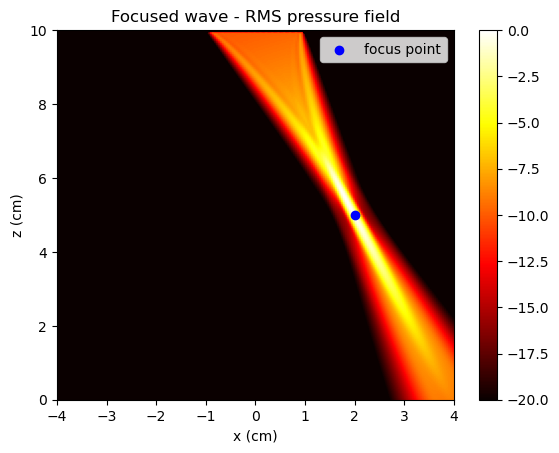

In [10]:
# Double check P

plt.imshow(20*np.log10(P/np.max(P)),cmap='hot',extent=[x[0,0]*1e2,x[0,-1]*1e2,z[0,0]*1e2,z[-1,0]*1e2],aspect='auto')
plt.colorbar()
plt.clim(-20, 0)
plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Focused wave - RMS pressure field')


plt.scatter(xf*1e2,zf*1e2,c = 'b', label = 'focus point')
plt.legend()


# Example #2: 3-D focused pressure field with a cardiac phased-array

This example shows how to generate a 3-D focused pressure field with a phased-array transducer.

Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param by using GETPARAM.


In [8]:

param = pymust.getparam('P4-2v');



Choose a focus location at xf = 2 cm, zf = 5 cm.


In [9]:
xf = -2e-2
zf = 5e-2 # focus position (in m)


Obtain the corresponding transmit time delays (in s).


In [10]:
txdel = pymust.txdelay(xf,zf,param) # in s


Simulate the pressure field by using PFIELD.

First define the x-, y-, z-coordinates:


In [11]:
x = np.linspace(-4e-2,4e-2,200);
y = np.linspace(-0.75,.75,50)*param.height;
z = np.linspace(0,10e-2,200);



Obtain the RMS pressure field on the azimuthal plane:


In [12]:
xaz,zaz = np.meshgrid(x,z);
yaz = np.zeros(xaz.shape);
Paz, _, _ = pymust.pfield(xaz,yaz,zaz,txdel,param);


Obtain the RMS pressure field on the elevation plane:


In [13]:
yel,zel = np.meshgrid(y,z)
xel = np.ones(yel.shape)*xf
Pel, _, _ = pymust.pfield(xel,yel,zel,txdel,param)


Obtain the RMS pressure field on the focal plane:


In [14]:
xfo,yfo = np.meshgrid(x,y)
zfo = np.ones(xfo.shape)*zf
Pfo, _ , _ = pymust.pfield(xfo,yfo,zfo,txdel,param)

Display the acoustic pressure field.


Text(0.5, 0.92, '3-D focused field ([-20,0] dB)')

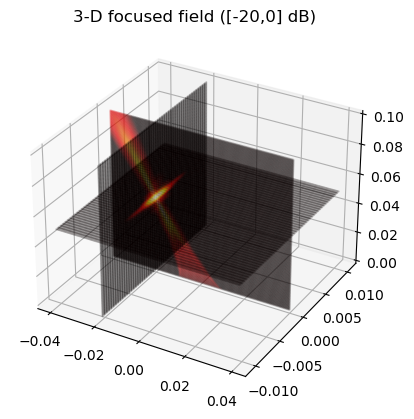

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cm = matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(-20, 0), 'hot')

color = cm.to_rgba(20*np.log10(Paz/np.max(Paz)))
color[:, :, 3] = .15
surf1 = ax.plot_surface(xaz, yaz, zaz, rstride=1, cstride=1, antialiased=True, facecolors = color, alpha = .05)

color = cm.to_rgba(20*np.log10(Pel/np.max(Pel)))
color[:, :, 3] = .15
surf2 = ax.plot_surface(xel,yel,zel, rstride=1, cstride=1, antialiased=True, facecolors = color, alpha = .05)

color = cm.to_rgba(20*np.log10(Pfo/np.max(Pfo)))
color[:, :, 3] = .15
surf3 = ax.plot_surface(xfo,yfo,zfo, rstride=1, cstride=1, antialiased=True, facecolors = color, alpha = .05)
plt.title('3-D focused field ([-20,0] dB)')

# Example #3: Diverging wave with a phased array

This example shows how to simulate a circular wave with a phased-array transducer with the 2-D approximation.

Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param by using GETPARAM.


In [16]:
param = pymust.getparam('P4-2v');


Calculate the transmit delays to generate a 75-degrees wide circular wave. Use TXDELAY.


In [17]:
width = 75/180*np.pi; # width angle in rad
tilt = 0; # tilt angle in rad
txdel = pymust.txdelay(param,tilt,width);#% in s


Define a transmit apodization.


In [18]:
param.TXapodization = np.cos(np.linspace(-3*np.pi/8,3*np.pi/8,64));

Text(0.5, 1.0, 'TX apodization')

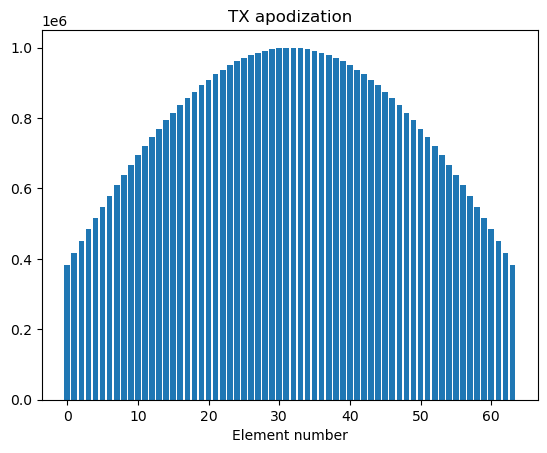

In [19]:
plt.bar(np.arange(txdel.shape[1]), param.TXapodization*1e6)
plt.xlabel('Element number')
plt.title('TX apodization')


Simulate the pressure field with PFIELD.

First define the image grid.


In [20]:
x = np.linspace(-4e-2,4e-2,200); # in m
z = np.linspace(0,10e-2,200); # in m
x,z = np.meshgrid(x,z);
y = np.zeros_like(x)


The function PFIELD yields the root-mean-square (RMS) pressure field.


In [21]:
P,_,_ = pymust.pfield(x, y, z,txdel,param);


Display the acoustic pressure field.


Text(0.5, 1.0, 'Diverging wave - RMS pressure field')

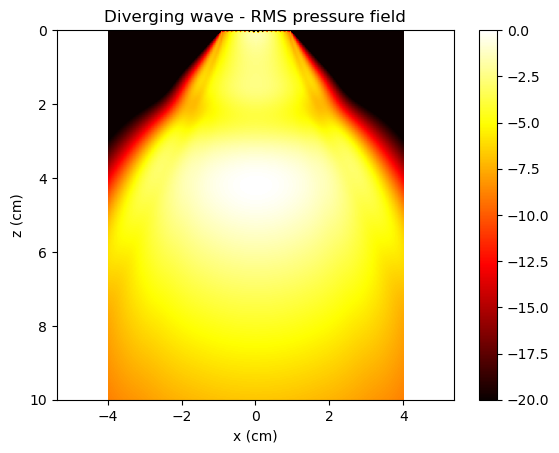

In [22]:
plt.imshow(20*np.log10(P/np.max(P)), extent = np.array([x[0,0], x[-1,0-1], z[-1,-1], z[0,0]])*1e2, cmap = 'hot')
plt.clim(-20, 0) #dynamic range = [-20,0] dB
plt.axis('equal')
c = plt.colorbar()
#c.YTickLabel{end} = '0 dB';

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Diverging wave - RMS pressure field')

# Example #4: Multi-line transmit (MLT) with a phased-array

This example shows how to generate a MLT transmit sequence with a phased-array transducer. In this example, a 3-MLT sequence is designed, i.e. three focused waves are transmitted simultaneously.

Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param by using GETPARAM.


In [23]:
param = pymust.getparam('P4-2v');


Define the TX delays for a 3-MLT transmit sequence.


In [24]:
x0 = 2e-2; 
z0 = 5e-2; # in m
xf = np.array([-x0, 0, x0]); 
zf = np.array([z0, np.sqrt(x0**2+z0**2), z0]); # focus points (in m)
txdel = pymust.txdelay(xf,zf,param); # in s


Simulate the pressure field with PFIELD.

Define the image grid.


In [25]:
x = np.linspace(-5e-2,5e-2,200); # in m
z = np.linspace(0,10e-2,200); # in m
x,z = np.meshgrid(x,z); # image grid
y = np.zeros(x.shape);


Use PFIELD to obtain the RMS pressure field.


In [26]:
P,_,_ = pymust.pfield(x,y,z,txdel,param)


Display the pressure field.


Text(0.5, 1.0, 'MLT - RMS pressure field')

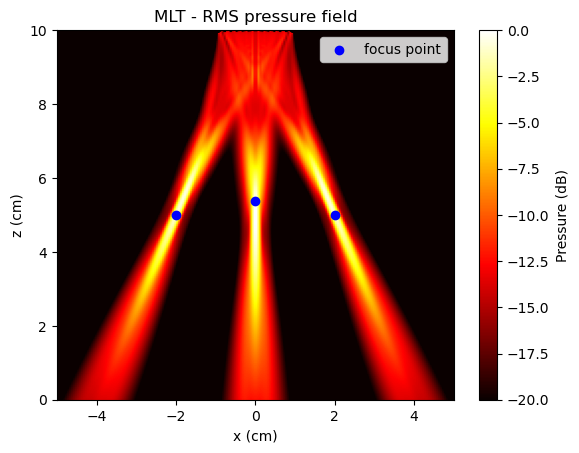

In [27]:
plt.imshow(20*np.log10(P/np.max(P)),cmap='hot',extent=[x[0,0]*1e2,x[0,-1]*1e2,z[0,0]*1e2,z[-1,0]*1e2],aspect='auto')
cbar = plt.colorbar()
cbar.set_label('Pressure (dB)')
plt.clim(-20, 0)
plt.scatter(xf*1e2,zf*1e2,c = 'b', label = 'focus point')
plt.legend()

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('MLT - RMS pressure field')



# Example #5: Focused pressure field with a subaperture of a linear array

This example shows how to generate a focused pressure field with a subaperture of a linear array transducer.

Download the properties of a 7.6-MHz 128-element uniform linear array in a structure param by using GETPARAM.



In [28]:
param = pymust.getparam('L11-5v');


Calculate the positions of the elements (for visualization).



In [29]:
L = param.pitch*(param.Nelements-1); # array aperture (in m)
xe = np.linspace(-0.5,0.5,param.Nelements)*L;
ze = np.zeros((1,param.Nelements));

Create a linear "sub-array" with 24 elements.

In [30]:
param_suba = copy.deepcopy(param);
param_suba.Nelements = 24;

Define a focus location at xf = 0 cm, zf = 2.5 cm, relative to the sub-array

In [31]:
xf = 0;
zf = 2.5e-2; #% focus position (in m)

Calculate the transmit time delays (in s) for the sub-array.

In [32]:
txdel_suba = pymust.txdelay(xf,zf,param_suba); # in s

Obtain the transmit time delays (in s) for the (complete) array...

... when firing with elements #1 to #24

In [33]:
txdel_1to24 = np.nan * np.zeros((1,128))
txdel_1to24[0, 0:24] = txdel_suba


... when firing with elements #91 to #114


In [34]:
txdel_91to114 =np.nan * np.zeros((1,128))
txdel_91to114[0, 90:114] = txdel_suba;

Simulate the pressure fields by using PFIELD.

First define an image grid.



In [35]:
x = np.linspace(-2.5e-2,2.5e-2,150); # in m
z = np.linspace(0,5e-2,150); # in m
x,z = np.meshgrid(x,z);
y = np.zeros(x.shape);

The function PFIELD yields the root-mean-square (RMS) pressure fields.


In [36]:
P_1to24, _, _ = pymust.pfield(x,y, z,txdel_1to24, param.copy()); # Copy the param, since otherwise TXapodization will be changed.
P_91to114,_,_ = pymust.pfield(x,y, z,txdel_91to114, param.copy());


Display the acoustic pressure field when firing elements #1 to #24.


Text(0.5, 1.0, 'Focused wave with elements #1 to #24')

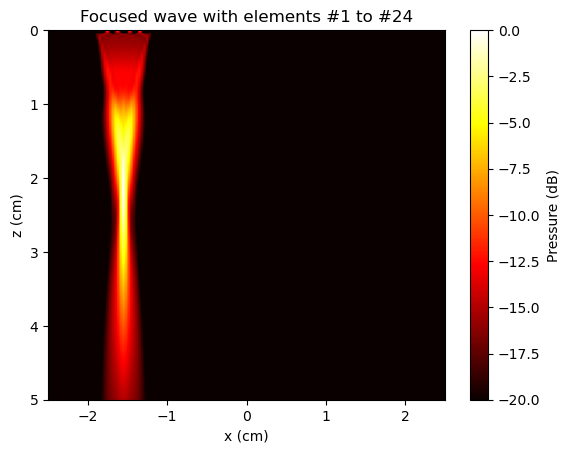

In [37]:
plt.imshow(20*np.log10(P_1to24/np.max(P_1to24)),cmap='hot',extent=[x[0,0]*1e2,x[0,-1]*1e2,z[-1,0]*1e2,z[0,0]*1e2],aspect='auto')
cbar = plt.colorbar()
cbar.set_label('Pressure (dB)')
plt.clim(-20, 0)

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Focused wave with elements #1 to #24')



Display the acoustic pressure field when firing elements #91 to #114.


Text(0.5, 1.0, 'Focused wave with elements #91 to #114')

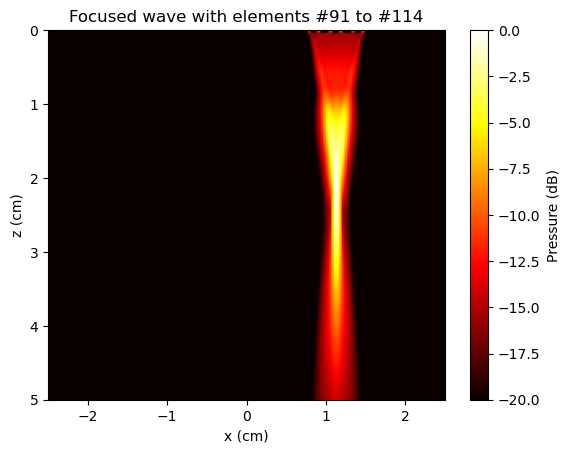

In [38]:
plt.imshow(20*np.log10(P_91to114/np.max(P_91to114)),cmap='hot',extent=[x[0,0]*1e2,x[0,-1]*1e2,z[-1,0]*1e2,z[0,0]*1e2],aspect='auto')
cbar = plt.colorbar()
cbar.set_label('Pressure (dB)')
plt.clim(-20, 0)

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Focused wave with elements #91 to #114')


# Example #6: Steered plane wave with a linear array

This example shows how to simulated a steered plane wave with a linear vascular transducer.

Download the properties of a 7.6-MHz 128-element uniform linear array in a structure param by using GETPARAM.

In [39]:
param = pymust.getparam('L11-5v');

Calculate the transmit delays for a plane wave steered at +10 degrees

In [40]:
tilt = 10/180*np.pi; # tilt angle in rad
txdel = pymust.txdelay(param,tilt); # in s

Use PFIELD to simulate the pressure field.

First define the image grid.

In [41]:
x = np.linspace(-4e-2,4e-2,150); # in m
z = np.linspace(0,8e-2,150); # in m
x,z = np.meshgrid(x,z);
y = np.zeros_like(x)

The function PFIELD yields the root-mean-square (RMS) pressure field.

In [42]:
P,_,_ = pymust.pfield(x,y,z,txdel,param)

Display the RMS acoustic pressure field.

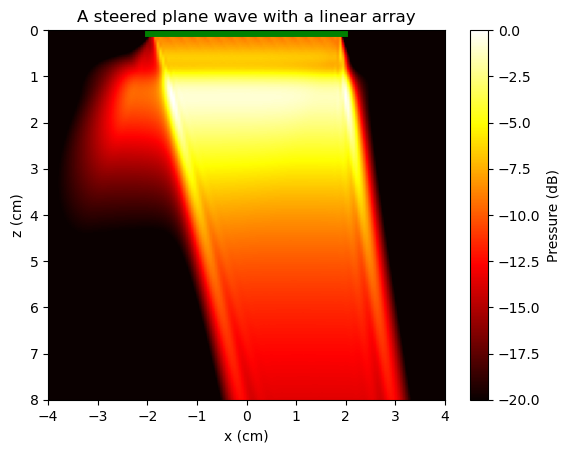

In [43]:
plt.imshow(20*np.log10(P/np.max(P)),cmap='hot',extent=[x[0,0]*1e2,x[0,-1]*1e2,z[-1,0]*1e2,z[0,0]*1e2],aspect='auto')
cbar = plt.colorbar()
cbar.set_label('Pressure (dB)')
plt.clim(-20, 0)

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('A steered plane wave with a linear array')

# Calculate the positions of the element centers.
xe, ze, _, _ = param.getElementPositions()
plt.plot(xe.flatten()*1e2,ze.flatten()*1e2, linewidth = 10, c = 'g');


Add an attenuation coefficient.

In [44]:
param.attenuation = 0.5; # attenuation coefficient (in dB/cm/MHz)

Calculate the pressure field and compare.

In [45]:
P,_,_ = pymust.pfield(x,y,z,txdel,param);

Text(0.5, 1.0, 'A plane wave with an attenuation coefficient of 0.5 dB/cm/MHz')

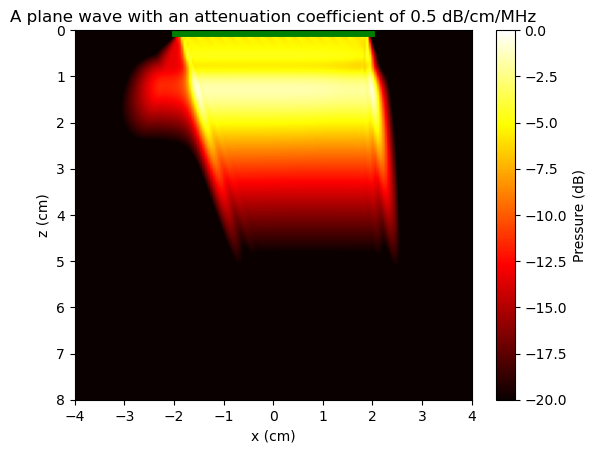

In [46]:
plt.imshow(20*np.log10(P/np.max(P)),cmap='hot',extent=[x[0,0]*1e2,x[0,-1]*1e2,z[-1,0]*1e2,z[0,0]*1e2],aspect='auto')
cbar = plt.colorbar()
cbar.set_label('Pressure (dB)')
plt.clim(-20, 0)

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('A steered plane wave with a linear array')

# Calculate the positions of the element centers.
xe, ze, _, _ = param.getElementPositions()
plt.plot(xe.flatten()*1e2,ze.flatten()*1e2, linewidth = 10, c = 'g');
plt.title('A plane wave with an attenuation coefficient of 0.5 dB/cm/MHz')

# Example #7: Focused pressure field with a subaperture of a curved array

This example shows how to generate a focused pressure field with a subaperture of a convex array transducer.

Download the properties of a 3.6-MHz 128-element curved linear array in a structure param by using GETPARAM.

In [47]:
param = pymust.getparam('C5-2v');

Calculate the positions of the elements (for visualization).

In [48]:
xe, ze, th, _  = param.getElementPositions();

Create a convex "sub-array" with 32 elements.

In [49]:
param_suba = param.copy()
param_suba.Nelements = 32


Define a focus location at xf = 0 cm, zf = 7.5 cm, relative to the sub-array


In [50]:
xf = 0
zf = 7.5e-2; # focus position (in m)


Calculate the transmit time delays (in s) for the sub-array.


In [51]:
txdel_suba = pymust.txdelay(xf,zf,param_suba); # in s


Obtain the transmit time delays (in s) for the (complete) array...


... when firing with elements #1 to #32


In [52]:
txdel_1to32 = np.nan* np.zeros((1,128))
txdel_1to32[0,:32] = txdel_suba

In [53]:
param.Nelements

128


... when firing with elements #83 to #114


In [54]:
txdel_83to114 = np.nan* np.zeros((1,128))
txdel_83to114[0, 82:114] = txdel_suba;


Simulate the pressure fields by using PFIELD.

First define an image polar-type grid by using IMPOLGRID.


In [55]:
x,z = pymust.impolgrid(np.array([128, 128]),15e-2,param)
y = np.zeros(x.shape);


The function PFIELD yields the root-mean-square (RMS) pressure fields.


In [56]:
P_1to32,_,_ = pymust.pfield(x,y,z,txdel_1to32,param.copy())
P_83to114,_,_ = pymust.pfield(x,y,z,txdel_83to114,param.copy())

In [60]:
import importlib
importlib.reload(pymust.utils)

<module 'pymust.utils' from '/Users/gbernardino/pymust/src/pymust/utils.py'>


Display the acoustic pressure field when firing elements #1 to #32.


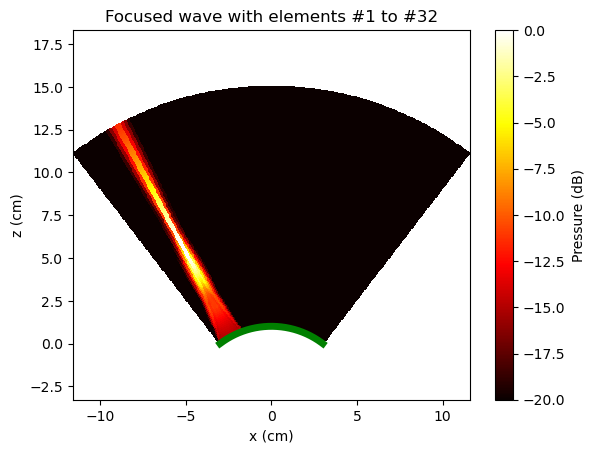

In [67]:
pymust.utils.polarplot(x*1e2,z*1e2, 20*np.log10(P_1to32/np.max(P_1to32)),cmap='hot', background = 'white')
cbar = plt.colorbar()
cbar.set_label('Pressure (dB)')
plt.clim(-20, 0)

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Focused wave with elements #1 to #32')
plt.plot(xe.flatten()*1e2,ze.flatten()*1e2, c= 'g', linewidth = 5);



Display the acoustic pressure field when firing elements #83 to #114.


/Users/gbernardino/pymust/src/pymust/utils.py:148: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x, z, v, cmap = cmap)


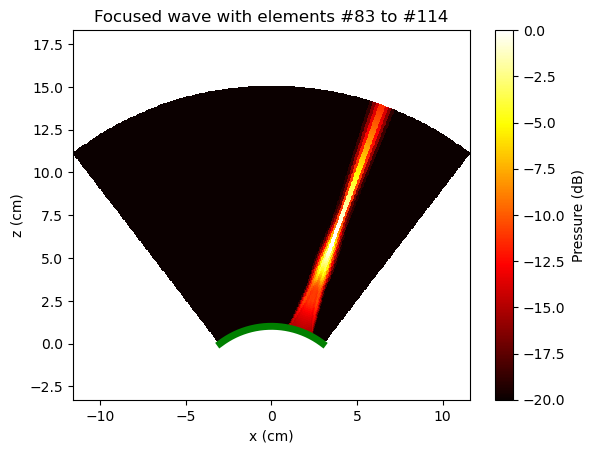

In [70]:
pymust.utils.polarplot(x*1e2, z*1e2, 20*np.log10(P_83to114/np.max(P_83to114)),cmap='hot', background = 'white')
cbar = plt.colorbar()
cbar.set_label('Pressure (dB)')
plt.clim(-20, 0)

plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Focused wave with elements #83 to #114')
plt.plot(xe.flatten()*1e2,ze.flatten()*1e2, c= 'g', linewidth = 5);

